In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from mpltools import style
from mpltools import layout
plt.style.use('seaborn-poster')


C:\ProgramData\Anaconda3\lib\site-packages\mpltools\style\__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,La strada nel bosco,2003
1,Loves of an Actress,1928
2,Little Miss Marker,1980
3,Kingdom Come,2013
4,Mr Bartholomew: The Hitman Cometh,2019


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

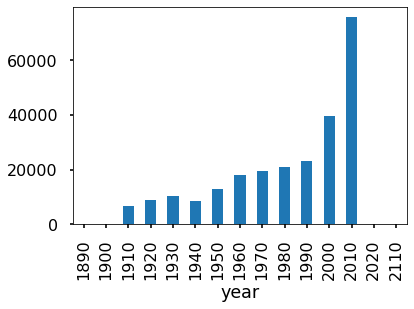

In [5]:
titles.groupby(titles.year // 10 * 10).size().plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

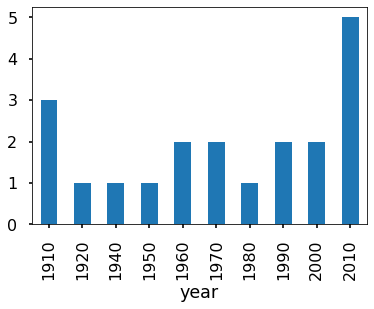

In [6]:
titles[titles.title == 'Hamlet'].groupby(titles.year // 10 * 10).size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

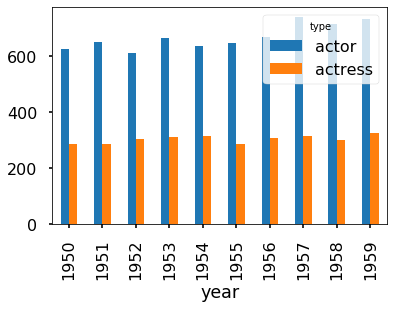

In [7]:
a = cast[(cast.n == 1) & (cast.year // 10 * 10 == 1950)].groupby(['year','type']).size().to_frame().unstack()
a.columns = a.columns.droplevel()
a.plot(kind='bar')

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [45]:
cast[(cast.year // 10 * 10 == 1950) & (cast.n >= 1) & (cast.n <= 5)].groupby([cast.n,cast.type]).size().to_frame()

0
n   type         
1.0 actor    6692
    actress  3040
2.0 actor    4640
    actress  4635
3.0 actor    5654
    actress  3201
4.0 actor    5663
    actress  2881
5.0 actor    5674
    actress  2592

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [23]:
cast[cast.title == 'The Pink Panther'].groupby('year').size()

year
1963    21
2006    90
dtype: int64

In [46]:
cast[cast.title == 'The Pink Panther'].groupby('year').max()

,title,name,type,character,n
year,,,,,
1963,The Pink Panther,William Bryant,actress,Waiter,15.0
2006,The Pink Panther,Za Kari A. Asher,actress,Yves Gluant,50.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [35]:
a = cast[cast.name == 'Frank Oz'].groupby(cast.title).size().to_frame()
a.columns = ['num_of_films']
a[a['num_of_films'] > 1]

,num_of_films
title,
An American Werewolf in London,2
Follow That Bird,3
Muppet Treasure Island,4
Muppets from Space,4
The Adventures of Elmo in Grouchland,3
The Dark Crystal,2
The Great Muppet Caper,6
The Muppet Christmas Carol,7
The Muppet Movie,8


In [39]:
a = cast[cast.name == 'Frank Oz'].groupby(cast.title).size()
a[a>1]

title
An American Werewolf in London          2
Follow That Bird                        3
Muppet Treasure Island                  4
Muppets from Space                      4
The Adventures of Elmo in Grouchland    3
The Dark Crystal                        2
The Great Muppet Caper                  6
The Muppet Christmas Carol              7
The Muppet Movie                        8
The Muppets Take Manhattan              7
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [44]:
a = cast[cast.name == 'Frank Oz'].groupby(cast.character).size()
a[a>1]

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64